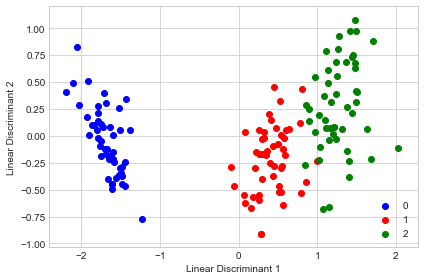

In [2]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

X, y = iris_data()
X = standardize(X)

lda = LinearDiscriminantAnalysis(n_discriminants=2)
lda.fit(X, y)
X_lda = lda.transform(X)


import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_lda[y == lab, 0],
                    X_lda[y == lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


# Example 2 - Plotting the Between-Class Variance Explained Ratio


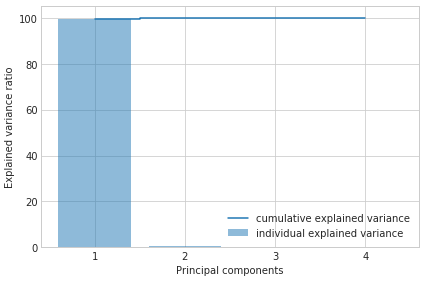

In [4]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis
import numpy as np

X, y = iris_data()
X = standardize(X)

lda = LinearDiscriminantAnalysis(n_discriminants=None)
lda.fit(X, y)
X_lda = lda.transform(X)


tot = sum(lda.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(lda.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

    
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(4))
    ax.set_xticklabels(np.arange(1, X.shape[1] + 1))
    plt.legend(loc='best')
    plt.tight_layout()
